In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
mnist['url']

'https://www.openml.org/d/554'

In [5]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [6]:
mnist['details']

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://old.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [3]:
X, y = mnist['data'], mnist['target']

X.shape
y.shape

(70000,)

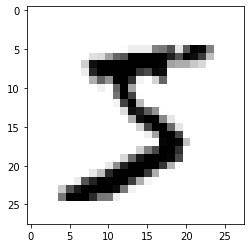

5


In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.loc[[0]]
some_digit_reshape = some_digit.values.reshape(28,28)

plt.imshow(some_digit_reshape, cmap="binary")
# plt.axis("off")
plt.show()
print(y[0])

In [8]:
import numpy as np
y = y.astype(np.uint8)

In [9]:
num_train = 60_000
X_train, X_test, y_train, y_test = X[:num_train], X[num_train:], y[:num_train], y[num_train:]

In [10]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_5)

SGDClassifier()

In [42]:
sgd_clf.predict(some_digit)

array([ True])

In [41]:
some_digit

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# This does almost the same thing as cross_val_score in sklearn

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
# divided into 3 parts (60_000 divided into 3)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.loc[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train.loc[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9654
0.96945
0.9701


In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9624 , 0.9638 , 0.96515])

In [24]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [25]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [26]:
y_train_pred.shape

(60000,)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
# each row: real value [0, 1]
# each column: prediction value [0, 1]

array([[53472,  1107],
       [ 1580,  3841]])

In [37]:
import numpy as np

currentDataClass = [1, 3, 3, 2, 5, 5, 3, 2, 1, 4, 3, 2, 1, 1, 2]
predictedClass = [1, 2, 3, 4, 2, 3, 3, 2, 1, 2, 3, 1, 5, 1, 1]

def comp_confmat(actual, predicted):

    classes = np.unique(actual) # extract the different classes
    matrix = np.zeros((len(classes), len(classes))) # initialize the confusion matrix with zeros

    for i in range(len(classes)):
        for j in range(len(classes)):
            matrix[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return matrix

In [38]:
comp_confmat(currentDataClass, predictedClass)

array([[3., 0., 0., 0., 1.],
       [2., 1., 0., 1., 0.],
       [0., 1., 3., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0.]])

In [45]:
from sklearn.metrics import precision_score, recall_score
print(f'Precision score is {precision_score(y_train_5, y_train_pred):.3f}')
print(f'Recall score is {recall_score(y_train_5, y_train_pred):.3f}')

Precision score is 0.776
Recall score is 0.709


In [46]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7408621853602083

In [48]:
some_digit

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Printing out decision score to see how the prediction varies throughout the threshold

In [49]:
y_scores = sgd_clf.decision_function(some_digit)
y_scores

array([3806.80215444])

In [51]:
threshold = 0
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [52]:
threshold = 8000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [54]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [57]:
y_scores.shape
y_scores

array([  -143.11299095, -18949.11210944, -26430.47315359, ...,
         6934.15887552,  -7120.67712709, -10062.41757171])

In [73]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [74]:
print(precisions.shape)
print(recalls.shape)
print(thresholds.shape)

(60001,)
(60001,)
(60000,)


In [85]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    

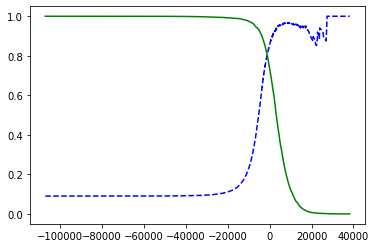

In [76]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

Text(0, 0.5, 'precision')

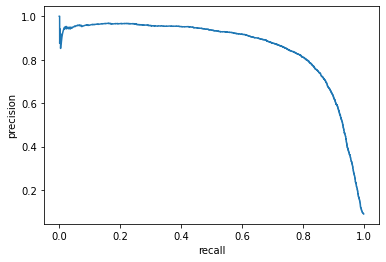

In [82]:
plt.plot(recalls, precisions)
plt.xlabel("recall")
plt.ylabel("precision")

In [103]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]

In [105]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [108]:
precision_score(y_train_5, y_train_pred_90)

0.9001524390243902

In [109]:
recall_score(y_train_5, y_train_pred_90)

0.6535694521306032

In [110]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [111]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')

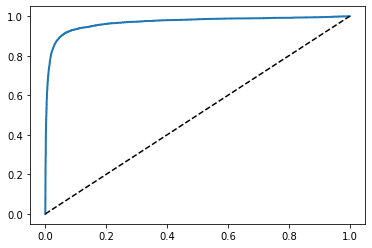

In [114]:
plot_roc_curve(fpr,tpr, ['false positive rate', 'true positive rate'])
plt.show()

In [115]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9682154550767548

## RandomForestClassifier

In [116]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [118]:
y_scores_forest = y_probas_forest[:,1]

In [124]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

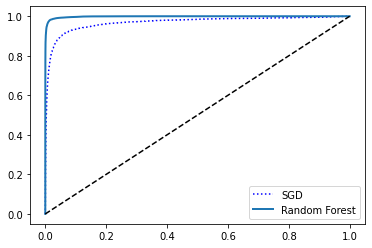

In [125]:
plt.plot(fpr,tpr, 'b:', label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [126]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [130]:
y_prediction_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [133]:
precision_score(y_train_5, y_prediction_forest)

0.9905083315756169

In [134]:
recall_score(y_train_5, y_prediction_forest)

0.8662608374838591

In [135]:
y_prediction_forest


array([ True, False, False, ...,  True, False, False])